In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/housing_data_train.csv")
test = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/housing_data_test.csv")

train.head()

,Id,BldgType,HouseStyle,OverallQual,GrLivArea,SalePrice,Neighborhood,LotArea,TotRmsAbvGrd
0,15,1Fam,1Story,6,1253,157000,NAmes,10920,5
1,17,1Fam,1Story,6,1004,149000,NAmes,11241,5
2,20,1Fam,1Story,5,1339,139000,NAmes,7560,6
3,27,1Fam,1Story,5,900,134800,NAmes,7200,5
4,29,1Fam,1Story,5,1600,207500,NAmes,16321,6


Q12

In [2]:
model = smf.ols(formula = "SalePrice ~ GrLivArea + OverallQual + LotArea + TotRmsAbvGrd", data = train).fit()
# fit model with 1% significance level

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     707.2
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          8.83e-269
Time:                        13:17:42   Log-Likelihood:                -10346.
No. Observations:                 856   AIC:                         2.070e+04
Df Residuals:                     851   BIC:                         2.073e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.318e+05   8349.223    -15.786   

Q13

In [3]:
# standard deviation of irreducible error is estimated by residual standard error
# residual standard error root(model.mse_resid) estimates standard deviation of irreducible error
# MSE of explained variation is variance of reducible error
# MSE_total = MSE_irreducible + MSE_explained
np.sqrt(model.mse_resid)

np.float64(43061.08396927367)

Q14

In [4]:
model_refit_14 = smf.ols(formula = "SalePrice ~ GrLivArea + OverallQual + LotArea + C(BldgType)", data = train).fit()
model_refit_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     414.7
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          9.43e-269
Time:                        13:17:42   Log-Likelihood:                -10336.
No. Observations:                 856   AIC:                         2.069e+04
Df Residuals:                     848   BIC:                         2.073e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.379e+05   6903.293    -19.983      0.000   -1.51e+05   -1.24e+05
C(BldgType)[T.2fmCon] -3.402e+04   9961.456     -3.415      0.001   -5.36e+04   -1.45e+04
C(BldgType)[T.Duplex] -9149.7907   7910.993     -1.157      0.248   -2.47e+04    6377.632
C(BldgType)[T.Twnhs]  -2.847e+04   1.01e+04     -2.832      0.005   -4.82e+04   -8736.436
C(BldgType)[T.TwnhsE] -1.103e+04   5948.819     -1.854      0.064   -2.27e+04     648.230
GrLivArea                57.3631      3.639     15.763      0.000      50.220      64.506
OverallQual            3.699e+04   1415.272     26.137      0.000    3.42e+04    3.98e+04
LotArea                   1.0079      0.152      6.616      0.000       0.709       1.307
==============================================================================
Omnibus:                      226.401   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1543.620
Skew:                           1.018   Prob(JB):                         0.00
Kurtosis:                       9.256   Cond. No.                     1.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q15

In [5]:
train_copy = train.copy()
train_copy["BldgType"] = np.where(train_copy["BldgType"] == "1Fam", "1Fam", "Other")
# model automatically expands X1*X2 to X1 + X2 + X1:X2
model_refit = smf.ols(formula="SalePrice ~ GrLivArea * C(BldgType) + OverallQual + LotArea", data=train_copy).fit()
model_refit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     586.3
Date:                Fri, 07 Feb 2025   Prob (F-statistic):          1.45e-272
Time:                        13:17:42   Log-Likelihood:                -10334.
No. Observations:                 856   AIC:                         2.068e+04
Df Residuals:                     850   BIC:                         2.071e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -1.389e+05   6627.029    -20.959      0.000   -1.52e+05   -1.26e+05
C(BldgType)[T.Other]            3.506e+04   1.56e+04      2.242      0.025    4367.666    6.58e+04
GrLivArea                         61.0313      3.655     16.700      0.000      53.858      68.204
GrLivArea:C(BldgType)[T.Other]   -34.1667     10.004     -3.415      0.001     -53.802     -14.532
OverallQual                     3.624e+04   1297.350     27.932      0.000    3.37e+04    3.88e+04
LotArea                            0.9942      0.150      6.629      0.000       0.700       1.289
==============================================================================
Omnibus:                      211.504   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1414.902
Skew:                           0.944   Prob(JB):                    5.73e-308
Kurtosis:                       9.009   Cond. No.                     1.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
model_refit.params["GrLivArea"] + model_refit.params["GrLivArea:C(BldgType)[T.Other]"]

np.float64(26.86454719640301)

Q16

In [7]:
pred_diff = -(model_refit.params["C(BldgType)[T.Other]"]+1500*model_refit.params["GrLivArea:C(BldgType)[T.Other]"])

print(pred_diff)

16189.598115529436


Q17

In [10]:
test_copy = test.copy()
test_copy["BldgType"] = np.where(test_copy["BldgType"] == "1Fam", "1Fam", "Other")

preds = model_refit.predict(test)

rmse = np.sqrt(mean_squared_error(test["SalePrice"], preds))
print(rmse)

41366.78832821682


Q18

<Axes: xlabel='None', ylabel='None'>

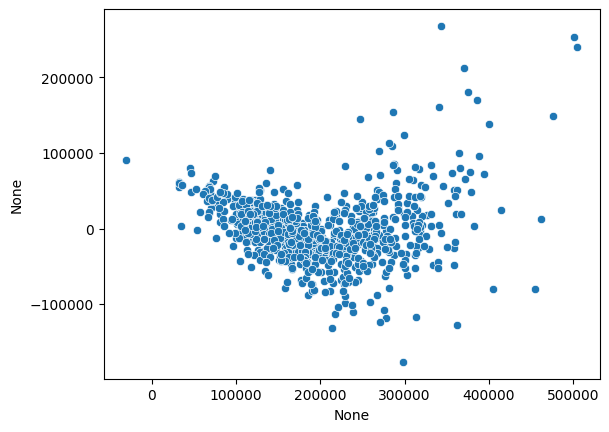

In [15]:
sns.scatterplot(x=model_refit_14.fittedvalues, y=model_refit_14.resid)

Q19

In [19]:
model_sk = LinearRegression()

train_encoded = pd.get_dummies(train[["GrLivArea", "OverallQual", "LotArea", "BldgType"]], drop_first=True)
model_sk.fit(train_encoded, train["SalePrice"])

test_encoded = pd.get_dummies(test[["GrLivArea", "OverallQual", "LotArea", "BldgType"]], drop_first=True)
predictions = model_sk.predict(test_encoded)

rmse = np.sqrt(mean_squared_error(test["SalePrice"], predictions))
print(rmse)



41434.0131007605
